                                   Review Title             Customer name  \
0  Another Midrange killer Smartphone by Xiaomi         Rishikumar Thakur   
1                         vry small size mobile                   Raza ji   
2  Full display not working in all application.             Vaibhav Patel   
3                               Value for Money           Amazon Customer   
4                       Not worth for the money  Sudhakaran Wadakkancheri   

               Rating                  Date Category  \
0  4.0 out of 5 stars     on 1 October 2018  Display   
1  3.0 out of 5 stars  on 15 September 2018   Others   
2  3.0 out of 5 stars  on 18 September 2018   Others   
3  5.0 out of 5 stars  on 28 September 2018  Display   
4  2.0 out of 5 stars  on 18 September 2018   Others   

                                            Comments  \
0  Another Midrange killer Smartphone by Xiaomi\n...   
1                   All ok but vry small size mobile   
2                               

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


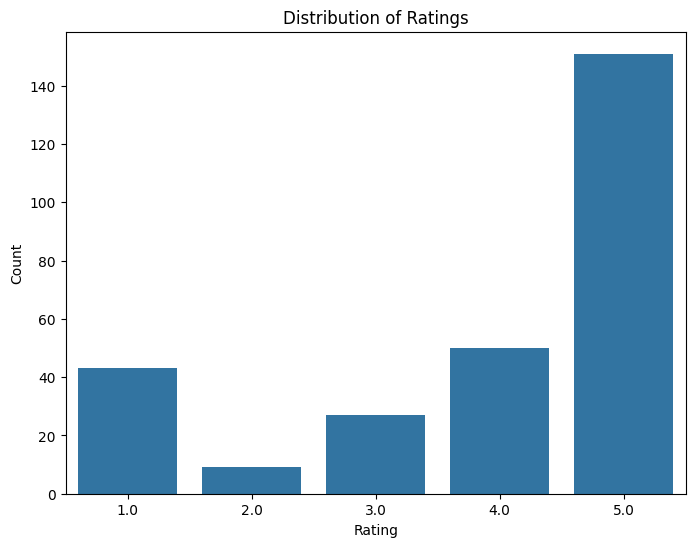

In [6]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
df = pd.read_csv('/content/data.csv', encoding='latin1')

# Display the first few rows of the dataset
print(df.head())

# Check for null values and data types
print(df.info())

# Clean the 'Rating' column to convert it to numeric values
df['Rating'] = df['Rating'].str.extract('(\d+\.?\d*)').astype(float)

# Function to clean text
def clean_text(text):
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = text.lower()  # Convert to lowercase
    text = text.split()  # Split into words
    text = [word for word in text if word not in stopwords.words('english')]  # Remove stopwords
    return ' '.join(text)

# Download the stopwords
nltk.download('stopwords')

# Apply the clean_text function to the Comments column
df['cleaned_comments'] = df['Comments'].apply(clean_text)

# Exploratory Data Analysis
# Plot the distribution of ratings
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Rating')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

# Prepare the dataset for sentiment analysis
# Create labels: 1 for positive (rating 4 or 5), 0 for negative (rating 1, 2, or 3)
df['Sentiment'] = (df['Rating'] >= 4).astype(int)

# Vectorize the cleaned comments
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['cleaned_comments'])

# Prepare labels
y = df['Sentiment']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)




In [7]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8571428571428571
              precision    recall  f1-score   support

           0       0.67      0.67      0.67        12
           1       0.91      0.91      0.91        44

    accuracy                           0.86        56
   macro avg       0.79      0.79      0.79        56
weighted avg       0.86      0.86      0.86        56

